In [1]:
import pysurfline

In [14]:
dir(pysurfline.reports)

['SURF_COLORS',
 'SpotForecasts',
 'SurfReport',
 'WIND_COLORS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'datetime',
 'degToCompass',
 'mdates',
 'pd',
 'pe',
 'plot_surf_report',
 'plt']

In [28]:
forecast = pysurfline.get_spot_forecasts("5842041f4e65fad6a7708c96", intervalHours=1, days=1)

In [69]:
pysurfline.get_spot_forecasts("61418593f20970d598c3f741")

In [21]:
help(pysurfline.get_spot_forecasts)

Help on function get_spot_forecasts in module pysurfline.api.public:

get_spot_forecasts(spotId: str, intervalHours: int = 3, days: int = 5) -> pysurfline.core.SpotForecasts
    get spot forecast

    Get forecast for given spot by passing the spotId
    argument.

    Arguments:
        spotId (str): spot id
        intervalHours (int, optional): interval hours. Defaults to None.
        days (int, optional): days. Defaults to None.

    Returns:
        forecast (:obj:`SpotForecast`)



In [99]:
forecast = forecast.get_dataframe()

In [106]:
forecast[forecast["timestamp_dt"].dt.hour == 5]

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
5,2024-03-18 05:00:00,1710738000,100,0,3,5,2,False,Waist to head,2.93416,...,0,0,13.724,233.0625,Offshore,20.59445,2,10.37754,NIGHT_MOSTLY_CLOUDY,1014


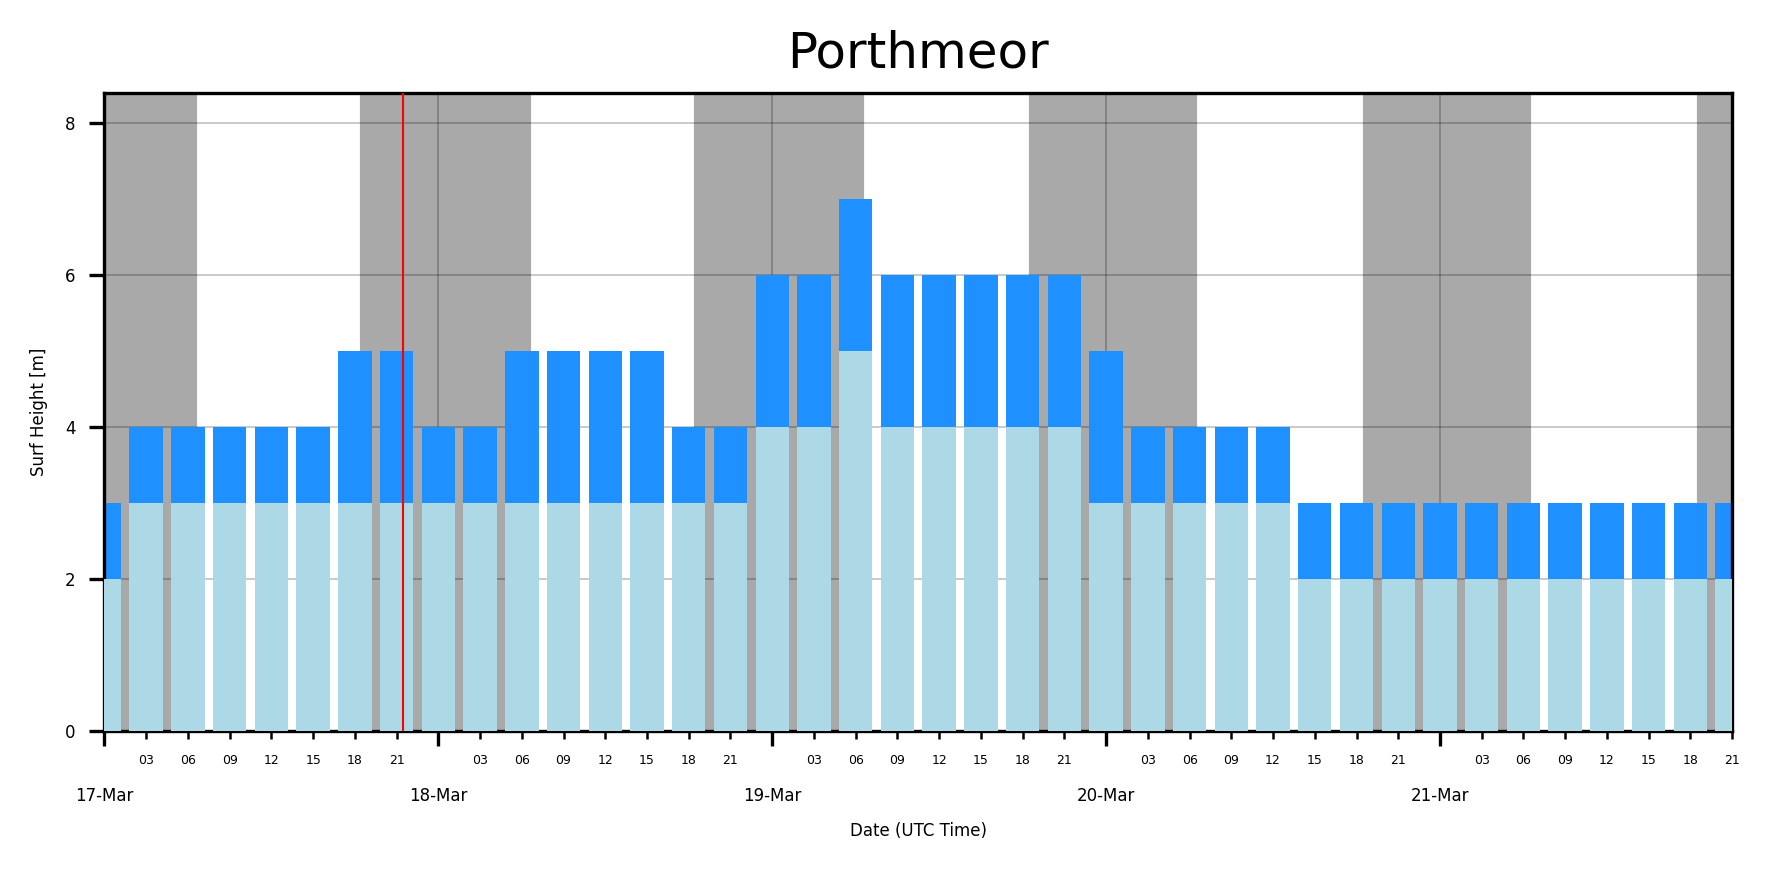

In [19]:
pysurfline.plot_surf_report(forecast)

In [32]:
import requests

url = "https://services.surfline.com/kbyg/mapview"

querystring = {"south":"49.781264058178344","west":"-30.761718750000004","north":"60.23981116999893","east":"23.73046875"}

payload = ""
headers = {
    "cookie": "__cf_bm=gREZpRundExDaA6MyH44aNlyLwCgO5rEOb_hfim4RSo-1710784227-1.0.1.1-LdGuZ9sYz._kEH77pXaRLQdYoBQyiqs9aADeAbkcL52VvDnus7SpubMOlgb0nS8pCqOWnzP3gj.ZPspJnEypSw",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0",
    "Accept": "*/*",
    "Accept-Language": "en-GB,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.surfline.com/",
    "Origin": "https://www.surfline.com",
    "Connection": "keep-alive",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-site",
    "TE": "trailers"
}

response = requests.request("GET", url, data=payload, headers=headers, params=querystring)


{"associated":{"units":{"windSpeed":"MPH","waveHeight":"FT","tideHeight":"M"}},"units":{"windSpeed":"MPH","waveHeight":"FT","tideHeight":"M"},"data":{"regionalForecast":{"iconUrl":"https://somecdn.surfline.com/region1.png","subregionId":"600783548ef661630df6a238"},"subregions":[{"_id":"58581a836630e24c44878ff0","subregion":{"id":"58581a836630e24c44878ff0","name":"North Devon","forecasterEmail":""}},{"_id":"58581a836630e24c44878ff1","subregion":{"id":"58581a836630e24c44878ff1","name":"West Ireland","forecasterEmail":""}},{"_id":"58581a836630e24c44879054","subregion":{"id":"58581a836630e24c44879054","name":"Northeast England","forecasterEmail":""}},{"_id":"58581a836630e24c44879065","subregion":{"id":"58581a836630e24c44879065","name":"Northwest Wales","forecasterEmail":""}},{"_id":"58581a836630e24c44879066","subregion":{"id":"58581a836630e24c44879066","name":"Highlands","forecasterEmail":""}},{"_id":"58581a836630e24c44879087","subregion":{"id":"58581a836630e24c44879087","name":"Western Is

In [40]:
with open("response.txt", "w") as file:
    file.write(response.text)

In [45]:
spot_id_dict = eval(response.text.replace("false", "False").replace("null", "None").replace("true", "True"))

In [50]:
import json
with open("spot_ids.json", "w") as file:
    file.write(json.dumps(spot_id_dict))

In [59]:
spot_id_dict_data = spot_id_dict["data"]

In [72]:
spots = spot_id_dict_data["spots"]

In [74]:
name_id_pairs = {}
for dictionary in spots:
    name_id_pairs[dictionary["name"]] = dictionary["_id"]

In [76]:
name_id_pairs

'5842041f4e65fad6a7708c96'

In [88]:
import pandas as pd

pre_df = [(key, value) for key, value in name_id_pairs.items()]
name_id_pairs_df = pd.DataFrame(pre_df, columns=['spot_name', 'spot_id'])

In [90]:
name_id_pairs_df.to_csv("spot_name_ids_map.csv")

In [110]:
import datetime
datetime.datetime(2024, 3, 18, 8, 0, 0).hour

8

In [13]:
from good_waves_please.api.gather_surf_data import gather_session_data, middle_time

In [2]:
import datetime

In [11]:
datetime.date(24,3,19)

datetime.date(24, 3, 19)

In [12]:
gather_session_data(
    spot_id='5842041f4e65fad6a7708c96', 
    got_in_time=datetime.time(4, 30), 
    got_out_time=datetime.time(6, 30), 
    date=datetime.date(24,3,19))

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,surf_raw_max,power,swells_0_height,swells_0_period,swells_0_impact,swells_0_power,swells_0_direction,swells_0_directionMin,swells_0_optimalScore,swells_1_height,swells_1_period,swells_1_impact,swells_1_power,swells_1_direction,swells_1_directionMin,swells_1_optimalScore,swells_2_height,swells_2_period,swells_2_impact,swells_2_power,swells_2_direction,swells_2_directionMin,swells_2_optimalScore,swells_3_height,swells_3_period,swells_3_impact,swells_3_power,swells_3_direction,swells_3_directionMin,swells_3_optimalScore,swells_4_height,swells_4_period,swells_4_impact,swells_4_power,swells_4_direction,swells_4_directionMin,swells_4_optimalScore,swells_5_height,swells_5_period,swells_5_impact,swells_5_power,swells_5_direction,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure


In [14]:
time_of_surf = middle_time(datetime.time(4, 30), datetime.time(6, 30))

In [15]:
time_of_surf

datetime.time(5, 30)

In [108]:
import pysurfline
forecast = pysurfline.get_spot_forecasts("5842041f4e65fad6a7708c96", intervalHours=1, days=1)

In [24]:
forecast.tides[0].__dataclass_fields__.keys()

dict_keys(['timestamp', 'utcOffset', 'type', 'height'])

In [118]:
type(forecast)

pysurfline.core.SpotForecasts

In [109]:
import pandas as pd
tide_df = pd.DataFrame([[item.timestamp.dt, item.utcOffset, item.type, item.height] for item in forecast.tides],
            columns=['timestamp_dt', 'utcOffset', 'tide_type', 'tide_height'])

In [110]:
forecast_df = forecast.get_dataframe()

In [111]:
forecast_df

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
0,2024-03-20 00:00:00,1710892800,100.000000,0,3,4,2,True,Waist to shoulder,2.78759,...,0,0,12.95471,188.27288,Offshore,21.29623,0,11.23132,NIGHT_CLEAR,1014
1,2024-03-20 01:00:00,1710896400,100.000000,0,3,4,2,True,Waist to shoulder,2.77048,...,0,0,12.99074,183.25501,Offshore,21.92597,0,10.99262,NIGHT_CLEAR,1014
2,2024-03-20 02:00:00,1710900000,100.000000,0,3,4,2,True,Waist to shoulder,2.75283,...,0,0,13.26003,179.56037,Offshore,22.15217,0,10.91518,NIGHT_CLEAR,1014
3,2024-03-20 03:00:00,1710903600,100.000000,0,3,4,2,True,Waist to shoulder,2.73465,...,0,0,14.19771,179.66297,Offshore,23.08595,0,10.70494,NIGHT_CLEAR,1014
4,2024-03-20 04:00:00,1710907200,100.000000,0,3,4,2,True,Waist to shoulder,2.70860,...,0,0,12.25563,178.55958,Offshore,21.25381,0,10.52068,NIGHT_CLEAR,1014
5,2024-03-20 05:00:00,1710910800,100.000000,0,3,4,2,True,Waist to shoulder,2.67859,...,0,0,10.05601,176.09082,Offshore,17.67755,0,10.44629,NIGHT_CLEAR,1014
6,2024-03-20 06:00:00,1710914400,100.000000,0,3,4,2,True,Waist to shoulder,2.64358,...,0,0,10.12809,177.16400,Offshore,17.68709,0,10.49359,CLEAR,1015
7,2024-03-20 07:00:00,1710918000,100.000000,0,3,4,2,True,Waist to shoulder,2.60962,...,0,0,9.16431,173.50150,Offshore,15.68557,0,10.62400,CLEAR,1015
8,2024-03-20 08:00:00,1710921600,100.000000,0,3,4,2,True,Waist to shoulder,2.57549,...,0,0,8.42581,180.56560,Offshore,13.29106,0,11.23119,CLEAR,1016
9,2024-03-20 09:00:00,1710925200,100.000000,0,3,4,2,False,Waist to chest,2.54119,...,0,0,7.64193,194.22152,Offshore,9.61883,0,11.94600,CLEAR,1016


In [113]:
#### NOTE: this check will make sure that in the ridiculously unqiue case where HIGH and LOW tides happen
#### on the 0 second and minute, then nothing happens
high_low_indices = tide_df[tide_df['type'].isin(['HIGH', 'LOW'])].index

for index in high_low_indices:
    if (tide_df.loc[index, "timestamp_dt"].second == 0) and (tide_df.loc[index, "timestamp_dt"].minute == 0):
        print("Do nothing") 
    else:
        if index == 0:
            nearest_in_time = tide_df.loc[index+1, :]
        else:
            before_diff = abs(tide_df.loc[index-1, "timestamp_dt"] - tide_df.loc[index, "timestamp_dt"])
            after_diff = abs(tide_df.loc[index+1, "timestamp_dt"] - tide_df.loc[index, "timestamp_dt"])
            nearest_in_time = tide_df.loc[index-1, :] if before_diff < after_diff else tide_df.loc[index+1, :]
        tide_df.loc[index, "timestamp_dt"] = nearest_in_time.copy()["timestamp_dt"]
        tide_df.drop(nearest_in_time.name, inplace=True)

In [117]:
forecast_df = forecast_df.merge(tide_df, on="timestamp_dt")

In [115]:
forecast_df

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
0,2024-03-20 00:00:00,1710892800,100.000000,0,3,4,2,True,Waist to shoulder,2.78759,...,0,0,12.95471,188.27288,Offshore,21.29623,0,11.23132,NIGHT_CLEAR,1014
1,2024-03-20 01:00:00,1710896400,100.000000,0,3,4,2,True,Waist to shoulder,2.77048,...,0,0,12.99074,183.25501,Offshore,21.92597,0,10.99262,NIGHT_CLEAR,1014
2,2024-03-20 02:00:00,1710900000,100.000000,0,3,4,2,True,Waist to shoulder,2.75283,...,0,0,13.26003,179.56037,Offshore,22.15217,0,10.91518,NIGHT_CLEAR,1014
3,2024-03-20 03:00:00,1710903600,100.000000,0,3,4,2,True,Waist to shoulder,2.73465,...,0,0,14.19771,179.66297,Offshore,23.08595,0,10.70494,NIGHT_CLEAR,1014
4,2024-03-20 04:00:00,1710907200,100.000000,0,3,4,2,True,Waist to shoulder,2.70860,...,0,0,12.25563,178.55958,Offshore,21.25381,0,10.52068,NIGHT_CLEAR,1014
5,2024-03-20 05:00:00,1710910800,100.000000,0,3,4,2,True,Waist to shoulder,2.67859,...,0,0,10.05601,176.09082,Offshore,17.67755,0,10.44629,NIGHT_CLEAR,1014
6,2024-03-20 06:00:00,1710914400,100.000000,0,3,4,2,True,Waist to shoulder,2.64358,...,0,0,10.12809,177.16400,Offshore,17.68709,0,10.49359,CLEAR,1015
7,2024-03-20 07:00:00,1710918000,100.000000,0,3,4,2,True,Waist to shoulder,2.60962,...,0,0,9.16431,173.50150,Offshore,15.68557,0,10.62400,CLEAR,1015
8,2024-03-20 08:00:00,1710921600,100.000000,0,3,4,2,True,Waist to shoulder,2.57549,...,0,0,8.42581,180.56560,Offshore,13.29106,0,11.23119,CLEAR,1016
9,2024-03-20 09:00:00,1710925200,100.000000,0,3,4,2,False,Waist to chest,2.54119,...,0,0,7.64193,194.22152,Offshore,9.61883,0,11.94600,CLEAR,1016


In [26]:
forecast_row = forecast_df[
    forecast_df["timestamp_dt"].dt.hour == time_of_surf.hour
    ]

In [27]:
forecast_row

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,surf_raw_max,power,swells_0_height,swells_0_period,swells_0_impact,swells_0_power,swells_0_direction,swells_0_directionMin,swells_0_optimalScore,swells_1_height,swells_1_period,swells_1_impact,swells_1_power,swells_1_direction,swells_1_directionMin,swells_1_optimalScore,swells_2_height,swells_2_period,swells_2_impact,swells_2_power,swells_2_direction,swells_2_directionMin,swells_2_optimalScore,swells_3_height,swells_3_period,swells_3_impact,swells_3_power,swells_3_direction,swells_3_directionMin,swells_3_optimalScore,swells_4_height,swells_4_period,swells_4_impact,swells_4_power,swells_4_direction,swells_4_directionMin,swells_4_optimalScore,swells_5_height,swells_5_period,swells_5_impact,swells_5_power,swells_5_direction,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
5,2024-03-19 05:00:00,1710824400,100,0,4,6,0,True,Chest to 1ft overhead,3.86061,6.03221,2308.87554,9.44882,12,1,2308.87554,281.9,272.265,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.65696,229.96205,Offshore,26.61957,2,11.03461,NIGHT_OVERCAST,1012


In [4]:
import streamlit as st
from sqlalchemy import create_engine
import pandas as pd

In [7]:
df = pd.read_csv("api/data/database.csv")

In [8]:
df["binary_rating"]

0    NaN
1    1.0
2    0.0
Name: binary_rating, dtype: float64

In [14]:
df.drop(columns="Unnamed: 0", inplace=True)

In [16]:
df.to_csv("api/data/database.csv", index=False)

In [15]:
df

,timestamp_dt,timestamp_timestamp,probability,utcOffset_x,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,utcOffset_y,tide_type,tide_height,scale_rating,qual_rating,wave_size_qual,wave_count_qual,crowd_qual,wind_qual,wave_shape_qual
0,2024-03-20 05:00:00,1710910800,100.0,0,3,4,2,True,Waist to shoulder,2.67859,...,0,NORMAL,3.80,NaN,NaN,test,NaN,NaN,NaN,NaN
1,2024-03-19 17:00:00,1710867600,100.0,0,3,5,2,False,Waist to head,3.12369,...,0,NORMAL,4.30,7.0,"good shape, chest high, medium crowd, punchy, ...",6,Catching loads of waves,"Average sized crowd, enough waves to go around...",Weak offshore,Steep and punchy
2,2024-03-20 06:00:00,1710914400,100.0,0,4,6,0,True,Chest to 1ft overhead,4.11593,...,0,NORMAL,1.73,5.0,test,99,Barely any,Basically empty,Strong onshore,"Mushburger, so fat/slack"


In [17]:
engine = create_engine(f'postgresql://{st.secrets.connections.postgresql.username}:{st.secrets.connections.postgresql.password}@{st.secrets.connections.postgresql.host}:{st.secrets.connections.postgresql.port}/{st.secrets.connections.postgresql.database}')
update = pd.read_csv("api/data/database.csv")
update.to_sql("surf_sessions", con=engine, if_exists="replace")

3

In [18]:
update

,timestamp_dt,timestamp_timestamp,probability,utcOffset_x,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,utcOffset_y,tide_type,tide_height,scale_rating,qual_rating,wave_size_qual,wave_count_qual,crowd_qual,wind_qual,wave_shape_qual
0,2024-03-20 05:00:00,1710910800,100.0,0,3,4,2,True,Waist to shoulder,2.67859,...,0,NORMAL,3.80,NaN,NaN,test,NaN,NaN,NaN,NaN
1,2024-03-19 17:00:00,1710867600,100.0,0,3,5,2,False,Waist to head,3.12369,...,0,NORMAL,4.30,7.0,"good shape, chest high, medium crowd, punchy, ...",6,Catching loads of waves,"Average sized crowd, enough waves to go around...",Weak offshore,Steep and punchy
2,2024-03-20 06:00:00,1710914400,100.0,0,4,6,0,True,Chest to 1ft overhead,4.11593,...,0,NORMAL,1.73,5.0,test,99,Barely any,Basically empty,Strong onshore,"Mushburger, so fat/slack"


#### Upload and Download to google storage

In [3]:
from google.cloud import storage

storage_client = storage.Client()


In [4]:
bucket = storage_client.bucket("surf_sessions")

In [8]:
blob = bucket.blob("database.csv")

In [4]:
import pandas as pd
import streamlit as st
from st_files_connection import FilesConnection
df = pd.read_csv("api/data/database.csv")
conn = st.connection('gcs', type=FilesConnection)
df.to_csv("gs://surf_sessions_data/database.csv", index=False)

2024-03-22 17:45:14.642 
  command:

    streamlit run /home/tristannew/.pyenv/versions/3.12.2/envs/good_waves_please_env/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [13]:
conn.protocol

'gcs'

In [14]:
conn.fs.to_json()

'{"cls": "gcsfs.core.GCSFileSystem", "protocol": "gcs", "args": []}'

In [21]:
from st_files_connection import FilesConnection
import streamlit as st

conn = st.connection("gcs", type=FilesConnection)
conn.read("surf_sessions_data/database.csv", input_format='csv')

2024-03-23 14:35:37.760 No runtime found, using MemoryCacheStorageManager
2024-03-23 14:35:37.764 No runtime found, using MemoryCacheStorageManager
2024-03-23 14:35:37.767 No runtime found, using MemoryCacheStorageManager
2024-03-23 14:35:37.771 No runtime found, using MemoryCacheStorageManager
2024-03-23 14:35:37.774 No runtime found, using MemoryCacheStorageManager


,timestamp_dt,timestamp_timestamp,probability,utcOffset_x,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,utcOffset_y,tide_type,tide_height,scale_rating,qual_rating,wave_size_qual,wave_count_qual,crowd_qual,wind_qual,wave_shape_qual
0,2024-03-20 05:00:00,1710910800,100.0,0,3,4,2,True,Waist to shoulder,2.67859,...,0,NORMAL,3.80,NaN,NaN,test,NaN,NaN,NaN,NaN
1,2024-03-19 17:00:00,1710867600,100.0,0,3,5,2,False,Waist to head,3.12369,...,0,NORMAL,4.30,7.0,"good shape, chest high, medium crowd, punchy, ...",6,Catching loads of waves,"Average sized crowd, enough waves to go around...",Weak offshore,Steep and punchy
2,2024-03-20 06:00:00,1710914400,100.0,0,4,6,0,True,Chest to 1ft overhead,4.11593,...,0,NORMAL,1.73,5.0,test,99,Barely any,Basically empty,Strong onshore,"Mushburger, so fat/slack"
3,2024-03-21 08:00:00,1711008000,100.0,0,2,3,2,True,Thigh to stomach,2.13906,...,0,NORMAL,1.37,5.0,test,4,Pretty average wave count,A few other people in,Medium offshore,Steep and punchy


In [29]:
with conn.open("surf_sessions_data/test.csv", "w") as file:
    df.to_csv(file, index=False)

In [24]:
dir(conn)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_config_section_hash',
 '_connect',
 '_connection_name',
 '_instance',
 '_kwargs',
 '_on_secrets_changed',
 '_raw_instance',
 '_repr_html_',
 '_secrets',
 'fs',
 'open',
 'protocol',
 'read',
 'reset']

In [16]:
help(conn.read)

Help on method read in module st_files_connection.connection:

read(path: 'str | Path', input_format: 'str' = None, ttl: 'Optional[Union[float, int, timedelta]]' = None, **kwargs) method of st_files_connection.connection.FilesConnection instance
    Read the file at the specified path, cache the result and return as a pandas DataFrame.

    input_format may be specified - valid values are `text`, `csv`, `parquet`, `json`, `jsonl`.
    If not specified, input_format will be inferred optimistically from path file extension.
    Result is cached indefinitely by default, set `ttl = 0` to disable caching.



In [18]:
df = pd.read_csv("api/data/database.csv")

In [19]:
df

,timestamp_dt,timestamp_timestamp,probability,utcOffset_x,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,utcOffset_y,tide_type,tide_height,scale_rating,qual_rating,wave_size_qual,wave_count_qual,crowd_qual,wind_qual,wave_shape_qual
0,2024-03-20 05:00:00,1710910800,100.0,0,3,4,2,True,Waist to shoulder,2.67859,...,0,NORMAL,3.80,NaN,NaN,test,NaN,NaN,NaN,NaN
1,2024-03-19 17:00:00,1710867600,100.0,0,3,5,2,False,Waist to head,3.12369,...,0,NORMAL,4.30,7.0,"good shape, chest high, medium crowd, punchy, ...",6,Catching loads of waves,"Average sized crowd, enough waves to go around...",Weak offshore,Steep and punchy
2,2024-03-20 06:00:00,1710914400,100.0,0,4,6,0,True,Chest to 1ft overhead,4.11593,...,0,NORMAL,1.73,5.0,test,99,Barely any,Basically empty,Strong onshore,"Mushburger, so fat/slack"
3,2024-03-21 08:00:00,1711008000,100.0,0,2,3,2,True,Thigh to stomach,2.13906,...,0,NORMAL,1.37,5.0,test,4,Pretty average wave count,A few other people in,Medium offshore,Steep and punchy


In [20]:
df.to_csv("gs://surf_sessions_data/database.csv", index=False)